__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [13]:
function metodo_euler(f::Function,x0::Int64,t0,tf,h) #comenzamos haciendo la función
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    
    
    return lista_x,lista_t
end

metodo_euler (generic function with 1 method)

In [2]:
metodo_euler((x,t)->-(2.5)*x,1,0,8,1) # Veamos si nuestra función funciona

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], 0.0:1.0:8.0)

In [65]:
# tenemos que la solucion de nuestra ecuación  diferencial es la siguiente

function q(x,t)
    exp.(-5t/2)
end



q (generic function with 1 method)

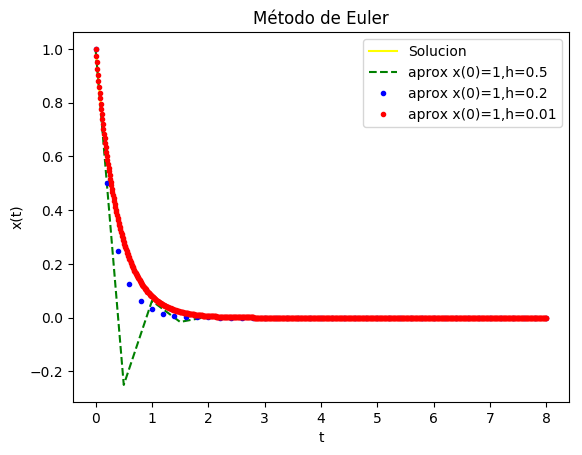

PyObject <matplotlib.legend.Legend object at 0x7f461f80ae50>

In [77]:
#Llego la hora de graficar 
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[1],label= "aprox x(0)=1,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[1],label= "aprox x(0)=1,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[1],label= "aprox x(0)=1,h=0.01",".",color="red")
legend()

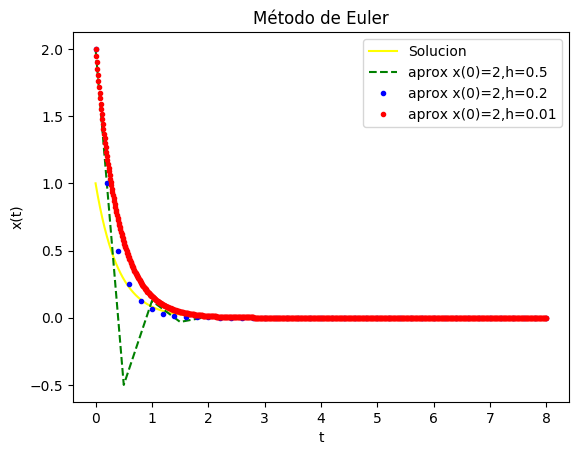

PyObject <matplotlib.legend.Legend object at 0x7f461f8d4a10>

In [76]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[1],label= "aprox x(0)=2,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[1],label= "aprox x(0)=2,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[1],label= "aprox x(0)=2,h=0.01",".",color="red")
legend()

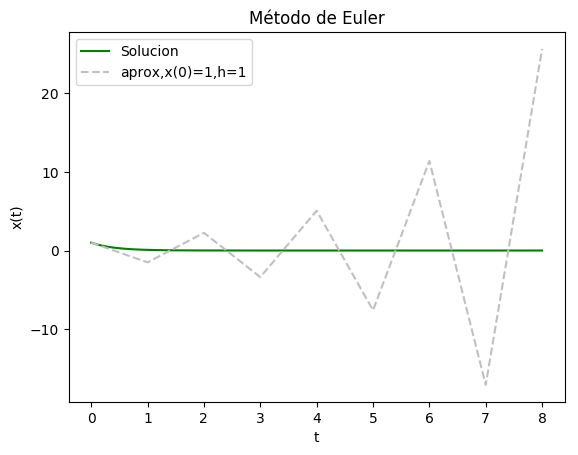

PyObject <matplotlib.legend.Legend object at 0x7f461f5b5d50>

In [80]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,1)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,1)[1],label="aprox,x(0)=1,h=1","--",color="silver");
legend()

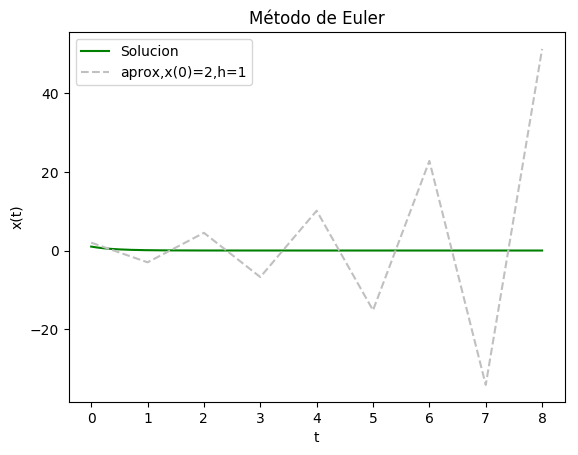

PyObject <matplotlib.legend.Legend object at 0x7f461f3c3bd0>

In [83]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,1)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,1)[1],label="aprox,x(0)=2,h=1","--",color="silver")
legend()

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

Tenemos que $$F=\frac{d^2x}{dt^2}$$ y recordando la ley de Hooke 

$F=-kx$ $\space$ entonces  $$-kx=m\frac{d^2x}{dt^2}$$
consideramos a $\space$ $m=1kg$
$$\frac{d^2x}{dt^2}+kx=0...(1)$$
Primero proponemos una solucion de la forma $$x=e^{\lambda x}$$ 
$$x'=\lambda e^{\lambda x}$$
$$x"=\lambda^2 e^{\lambda x}$$

ahora susutituimos en (1) y tenemos que $$(\lambda^2 + k)e^{\lambda x}=0$$
reolvemos la ecuación y como $$e^{\lambda x}\neq 0$$
$$(\lambda^2 + k)=0$$
donde $$\lambda_{1}=\sqrt{ki}$$ y $$\lambda_{2}=-\sqrt{ki}  $$ 
por lo que la solución es la combinacion lineal de las dos soluciones

$$x(t)=c_{1}e^{\sqrt{ki} t}+c_{2}e^{-\sqrt{ki} t}$$

aplicamos la formula de Euler y tenemos que 
$$x(t)=A_{1}cos(\sqrt{k} t )+A_{2}sin(\sqrt{k} t )$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

Aqui si hacemos $$\frac{dx}{dt}=-kx$$ se obtendran dos ecuaciones

_Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [2]:
#Para este ejercicio ocupamos el codigo que realizó el profe
function metodo_euler2(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler2 (generic function with 1 method)

In [7]:
f(x,t) = [x[2], -x[1]]     
list = 0:0.01:20;         
vec = metodo_euler2(f,list,[1,0]);    
listx1 = map(x->x[1],vec);          
listx2 = map(x->x[2],vec);

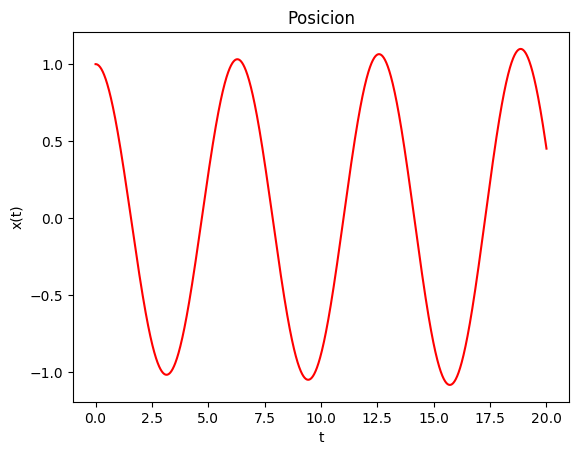

In [8]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Posicion") 
plot(list,listx1, color ="red")                   # Graficando las soluciones obtenidas. 
legend()
#plot(list,listx2, color ="blue", label = L"Velocidad");
legend()



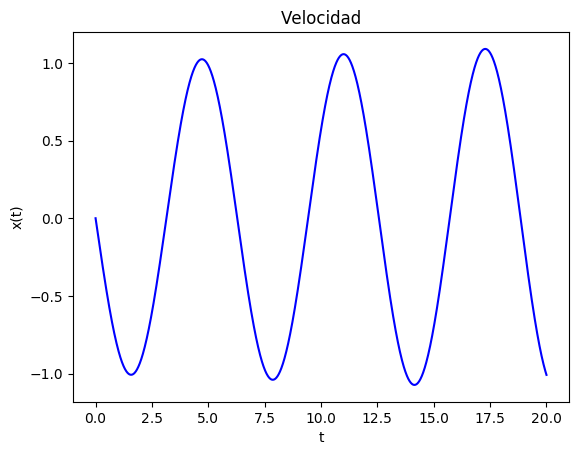

In [11]:
xlabel("t")
ylabel("x(t)")
title("Velocidad")
plot(list,listx2, color ="blue");
legend()

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

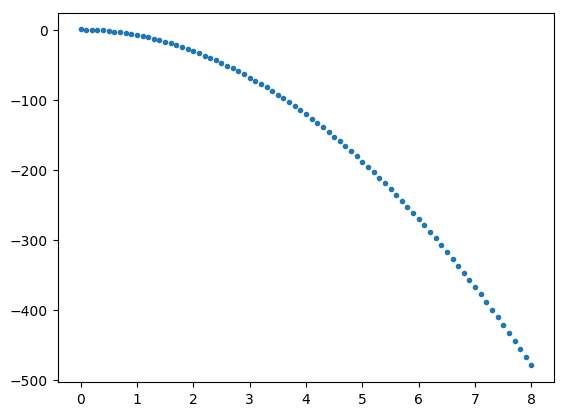

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87c8707cd0>

In [18]:
plot(metodo_euler((x,t)->(2*x-18*t)/(1+t),1,0,8,0.1)[2],metodo_euler((x,t)->(2*x-18*t)/(1+t),1,0,8,0.1)[1],".")


In [ ]:
function real(t)
    4+8*t-5*t*t
end